## Enviroment Setup

**Anaconda** is a distribution of the Python and R programming languages for scientific computing, that aims to simplify package management and deployment. You can install Anaconda through https://www.anaconda.com/products/individual 

Create an environment named gnn with python 3.8.

`conda create --name gnn python=3.8 -y`

Activate the gnn environment

`conda activate gnn`

Install pytorch. If you don't have GPU, you can install pytorch through the following command. If you have GPUs, please refer to https://pytorch.org/get-started/locally/ .

`pip3 install torch torchvision torchaudio`

`pip install matplotlib`

If you want to use jupyter notebook, you can use the following commands.

`conda install -c anaconda ipykernel`

`python -m ipykernel install --user --name=gnn`

Run jupyter notebook

`jupyter notebook`

![](figures/jupkernel.png)

# Introduction to Pytorch


PyTorch is a very popular deep learning framework at present. Its simple interface design and detailed documentation greatly reduce the learning cost. Unlike TensorFlow, another popular deep learning framework, PyTorch is based on **dynamic graphs**, that is, PyTorch will rebuild a new calculation graph every time it calculates forward. This feature makes PyTorch more intuitive, the logic of writing code is closer to the style of Python itself, and it is easier to debug. Next we introduce some important features of PyTorch.

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

Here is a brief introduction to Pytorch. If you want to learn more about Pytorch, please refer to https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html.

## 0.1 Tensor
The core of PyTorch is the Tensor object. Tensors are **multi-dimensional array** objects that can be used to represent one-dimensional vectors (arrays) and high-dimensional matrices. PyTorch provides a variety of APIs for fast array operations, and users can use GPUs to accelerate calculations involving Tensors. Tensor objects and Numpy's ndarray objects are very similar, both representing multi-dimensional arrays, and many APIs are also similar.

In [2]:
# Creat an array
a = [[1,2], [3, 4]]
b = torch.tensor(a)
c = torch.FloatTensor(a)
print(b)
print(c)

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]])


In [3]:
# Creat an array from numpy
import numpy as np
np_array = np.array(a)
d = torch.from_numpy(np_array)
e = d.float()
print(np_array)
print(d)
print(e)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]])


In [4]:
# Create a random array with shape (2, 3)
a = torch.randn((2, 3))
print(a)

tensor([[ 1.6903,  0.5849, -0.6746],
        [ 0.2974,  0.7451,  0.7249]])


In [5]:
b = torch.ones((2, 3))
print(b)
print(a + b)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2.6903, 1.5849, 0.3254],
        [1.2974, 1.7451, 1.7249]])


In [6]:
c = torch.ones((3, 2))
print(c)
print(a.mm(c))  # mm is matmul，which means matrix multiplication

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1.6006, 1.6006],
        [1.7674, 1.7674]])


In [7]:
# Element-wise product
a * b

tensor([[ 1.6903,  0.5849, -0.6746],
        [ 0.2974,  0.7451,  0.7249]])

In [8]:
a.to('cpu') # Put a into CPU. Not necessary, the default location of tensor is CPU.
# a.to('cuda') # Put a into GPU if you have installed the GPU version Pytorch.

tensor([[ 1.6903,  0.5849, -0.6746],
        [ 0.2974,  0.7451,  0.7249]])

## 0.2 BackPropagation of PyTorch
When training neural networks, the most frequently used algorithm is **back propagation**. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.


### 0.2.1 Autograd
To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.


In [9]:
# Create a tensor with gradient
a_ = torch.ones((2,2), requires_grad=True)
a_

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [10]:
# At first the gradient of a_ is None
a_.grad

In [11]:
b_ = a_ + 1
b_

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)

There is a function named grad_fn in tensor b. The grad_fn records the operation that created tensor b, which facilitates later backpropagation (differentiation).

In [12]:
# define sum_
sum_ = b_.sum()
sum_

tensor(8., grad_fn=<SumBackward0>)

In [13]:
# Do the backpropagation based on sum_
sum_.backward()

In [14]:
# Finally, we get the gradient of a_
a_.grad

tensor([[1., 1.],
        [1., 1.]])

It's worth noting that after calling the backward() function once, the associated computational graph will be cleared. If you call backward() twice, the second call will result in an error.

### 0.2.2 PyTorch optimizer
We have learned that we can use the backward() function to obtain the gradient of a tensor, which allows us to update the parameters using gradient descent. There are many variants of gradient descent, such as SGD, Momentum gradient descent, and Adam gradient descent. PyTorch has already implemented these optimization methods for us in **torch.optim**, which we can use directly.

In [15]:
param = nn.Parameter(torch.ones(2,2))
optimizer0 = torch.optim.SGD([param], lr=0.1)

In [16]:
param

Parameter containing:
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [17]:
# We define a loss，which is the square sum of all elements in para. So when the minimun loss is 0，and param=0.
loss0 = (param**2).sum()
print(loss0)

tensor(4., grad_fn=<SumBackward0>)


In [18]:
# Before calling backward(), we need to call zero_grad() to clear the gradients in the parameters; 
# otherwise, the gradient values will accumulate.
optimizer0.zero_grad() 
loss0.backward() # calculate the gradients
optimizer0.step() # the step() is to update the param
print(param)

Parameter containing:
tensor([[0.8000, 0.8000],
        [0.8000, 0.8000]], requires_grad=True)


In [19]:
# We can use a loop to optimize the param
for i in range(20):
    optimizer0.zero_grad()
    loss0 = (param**2).sum()
    loss0.backward()
    optimizer0.step()
    print('loss value: {:.4f}'.format(loss0.item()))
print('final param：', param)

loss value: 2.5600
loss value: 1.6384
loss value: 1.0486
loss value: 0.6711
loss value: 0.4295
loss value: 0.2749
loss value: 0.1759
loss value: 0.1126
loss value: 0.0721
loss value: 0.0461
loss value: 0.0295
loss value: 0.0189
loss value: 0.0121
loss value: 0.0077
loss value: 0.0050
loss value: 0.0032
loss value: 0.0020
loss value: 0.0013
loss value: 0.0008
loss value: 0.0005
final param： Parameter containing:
tensor([[0.0092, 0.0092],
        [0.0092, 0.0092]], requires_grad=True)


From the example above, we can see that the loss value is continuously decreasing, and the final param we obtained is also very close to 0.

# An example of Image classification.

## 1. Load Data

We take the MNIST dataset as an example to show how to load data in PyTorch. The MNIST dataset contains 10 different handwritten digits, namely 0 to 9. The label of each image is a number from 0 to 9. On this dataset, our task is to predict which digit a picture corresponds to, so this is a classification problem.

In [20]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Download MNIST dataset and save to data folder.
data_train = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
data_test = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())

data_train and data_test are train and test data. We can access their contents by index, which returns data in the form of (data, label).

In [21]:
img, label = data_train[0] # Get the first image
print(img.size())
print(label)

torch.Size([1, 28, 28])
5


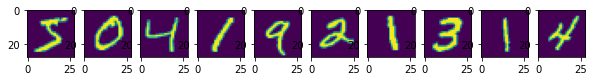

In [22]:
# Plot the first ten images
plt.figure(figsize=(10, 2))
for i in range(10):
    img, label = data_train[i]
    img = img.numpy().squeeze() # squeeze() will trasform the img size from (1，28，28）to（28，28)
    plt.subplot(1, 10, i+1)
    plt.imshow(img)

## 2. FeedForward Neural Networks

In the previous section, we have learned how to load data in PyTorch. Now we will explain how to build and train a feedforward neural network in PyTorch to complete a classification task.

First, let's review the construction of a feedforward neural network. The following diagram shows a neural network with two layers, i.e., (1) from input to hidden layer and (2) from hidden layer to output. We usually apply **Softmax** to the output vector to obtain the probability of each class, and then calculate the loss function. Next, we will show how to build a network in PyTorch. Note that a feedforward neural network is also called a Multi-Layer Perceptron (MLP), and we will use MLP to represent a feedforward neural network in the following description.
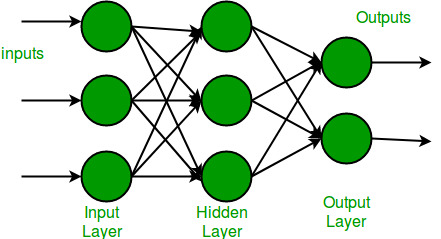

### 2.1.1 Build The MLP


Since the operations in a neural network are essentially matrix operations, we can directly represent the network using matrix operations. For example, given an input x, the operation in a linear layer can be represented as: x' = W x + b, where W and b are the parameters of this linear layer. Following the principles of Object-Oriented Programming (OOP), we define a class for a feedforward neural network and encapsulate the functions we need within it. We can design a two-layer feedforward neural network based on the following logic:
```
# Pseudo Code
class MLP:
    def __init__(self):
        self.layer1 = xxx
        self.layer2 = xxx
    
    def forward(self, x): # x is the input
        # self.layer1
        # Non linear function
        # self.layer2
        # Softmax
        return something
```

In [23]:
class Linear(nn.Module): # Inheritance torch.nn.Module
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.weight = nn.Parameter(torch.randn(in_features, out_features)) 
        self.bias = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x): # x is the input
        x = x.mm(self.weight) 
        return x + self.bias

Some notes to keep in mind:

1. The Linear layer we define needs to inherit from the nn.Module (torch.nn.Module) class. After inheriting this class, the Linear class can use the functions defined in the nn.Module class, such as eval(), to(). At the same time, after inheriting, we need to call the initialization function of the parent class, i.e., super(Linear, self).__init__().
2. Here we define two types of parameters, i.e., self.weight and self.bias.
3. When defining the parameters, we use torch.randn(), which initializes the parameters.
4. The forward function represents the forward process in the network and obtains the output. Since this class inherits from nn.Module, when we instantiate this class, such as layer = Linear(...), layer() is equivalent to layer.forward().

In [24]:
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(MLP, self).__init__()
        self.in_features = in_features
        self.layer1 = Linear(in_features, hidden_features)  # Linear()
        self.layer2 = Linear(hidden_features, out_features)
        
    def forward(self,x):
        x = x.view(-1, self.in_features) # Transform each image to a vector,
        x = self.layer1(x)
        x = F.relu(x) # ReLU
        return self.layer2(x)

Some notes to keep in mind:

1. Similarly, the MLP class also needs to inherit from nn.Module.
2. We need a non-linear activation layer between layers, and here we use ReLU.
3. Not all MLPs need the step x = x.view(-1, self.in_features). Here, we only do this because our input data is two-dimensional images, and we need to convert them to vectors.
4. Note that we did not use the Softmax layer here because we use torch.nn.CrossEntropyLoss as the loss function later, which already includes the Softmax operation.




## 2.1.2 Using Pre-defined Neural Network Layers in PyTorch
Next, we will directly use the pre-defined linear layer (torch.nn.Linear) in PyTorch instead of defining it manually.

In [25]:
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(MLP, self).__init__()
        self.in_features = in_features
        self.layer1 = nn.Linear(in_features, hidden_features) # nn.Linear is a class in PyTorch
        self.layer2 = nn.Linear(hidden_features, out_features)
        
    def forward(self, x):
        x = x.view(-1, self.in_features)
        x = self.layer1(x)
        x = F.relu(x)
        return self.layer2(x)

There are a lot of pre-defined layers/networks in Pytorch. Please refer to https://pytorch.org/docs/stable/nn.html.

### 2.1.3  Foward propogation

In [26]:
# Take the first image as an example

img, label = data_train[0]
img = img.view(-1)  # (1,28,28) --> (784,)
feat_dim = len(img) # 784
num_classes = 10
model = MLP(in_features=feat_dim, hidden_features=256, out_features=num_classes)

In [27]:
model

MLP(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=10, bias=True)
)

In [28]:
# We define a device variable to determine whether we want to run the data and model on the GPU.
# If CUDA is not installed, we will use the CPU.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [29]:
device

'cpu'

In [30]:
# To move the model and data to the device (CPU or GPU):
model = model.to(device) 
img = img.to(device)  

In [31]:
output = model(img)
output

tensor([[-0.0862, -0.0356, -0.0887,  0.0485,  0.0151,  0.0863, -0.0162,  0.0019,
         -0.0135, -0.1770]], grad_fn=<AddmmBackward0>)

The output of the model is a vector of length 10. We can consider each element as the probability of the corresponding class (here, it is the unnormalized probability, usually referred to as logits).

In [32]:
# We take the class corresponding to the maximum value and compare it with the true class:
predicted = output.argmax()
print('Predicted Label:', predicted.item(), '; True Label:', label)

Predicted Label: 5 ; True Label: 5


### 2.2 Train a Neural Network
Previously, we explained how to build a neural network and how to obtain the output for the corresponding data, but the parameters in the model have not been optimized, so the prediction results are often poor. Next, we will explain how to train a neural network.
```
# Pseudo Code
def train():
    for epoch in num_epochs:
        # Get a batch of data
        # Forward
        # Calculate loss
        # Backward
        # Update paramters
```

In [33]:

def train(model, data, num_epochs=5, learning_rate=1e-3, batch_size=32):
    # define an optimizer
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5) # weight_decay is the L2 Regularization
    
    # Put the data into DataLoader，so we can get a batch of data
    train_loader = torch.utils.data.DataLoader(data, 
                                               batch_size=batch_size, 
                                               shuffle=True)
    # define loss function
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        loss_total = 0 # 
        for data in train_loader:
            # clear the gradient
            optimizer.zero_grad()
            
            img, label = data
            img = img.to(device)
            label = label.to(device)
            
            # forward, loss and backward 
            output = model(img)
            loss = criterion(output, label)
            loss.backward()
            
            # optimize the parameters
            optimizer.step()
            
        loss_total += loss.item() 
        print('Epoch: {}, Training Loss: {:.4f}'.format(epoch+1, loss_total))


In [ ]:
train(model, data_train)

Epoch: 1, Training Loss: 0.1671
Epoch: 2, Training Loss: 0.1440
Epoch: 3, Training Loss: 0.0536
Epoch: 4, Training Loss: 0.0694


In [ ]:
@torch.no_grad() # We need not to do gradient backpropagation during test
def test(model, data, batch_size=128):
    num_correct = 0 # Correct prediction
    num_total = 0 # All images
    
    test_loader = torch.utils.data.DataLoader(data, 
                                              batch_size=batch_size, 
                                              shuffle=False)
    for data in test_loader: # get the batch data
        img, label = data
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        predicted = output.argmax(1) # prediction
        num_total += len(label)
        num_correct += (predicted == label).sum()

    print('There are {} images，the Accuracy is : {:.2f}%'.format(num_correct, 100 * num_correct / num_total))    

In [ ]:
test(model, data_train)
test(model, data_test)

We often split data into train, validation, test sets. Then, we can test the validation set accuracy every epoch. And choose the epoch with highest validation accuray as our final model. We can test on the test set based on the selected model.